In [107]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import plot_spectrals as spec_fun
import adiabatics as agp
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')

../results/Heisenberg/disorder/PBC/


# LOCALISATION LENGTH

In [108]:

def load_loc(w = 0.2):
    name = "/Users/rafal.swietek/Projects/Transverse_Ising_ETH/IsignTransverse_ETH/results/ANDERSON/1D/PBC/LocalisationLength/Distribution/_L=%d,J=1.00,J0=0.00,w=%.2f.dat"%(L,w)
    loc_len = np.loadtxt(name, unpack=True)
    return np.array(loc_len)

def load_orbital(w = 0.2, n = 100):
    name = "/Users/rafal.swietek/Projects/Transverse_Ising_ETH/IsignTransverse_ETH/results/ANDERSON/1D/PBC/CorrelationFunction/_L=%d_n=%d_w=%.2f.dat"%(L, n, w)
    orbital = np.loadtxt(name, unpack=True)
    return np.array(orbital)

L = 1000
J = 1.0
dis = np.linspace(0.4, 3.0, 14)

def gaussian(x, mu, sigma, A):
    return A*np.exp(- (x-mu)**2 / (2*sigma**2))

(0.5, 80.0)

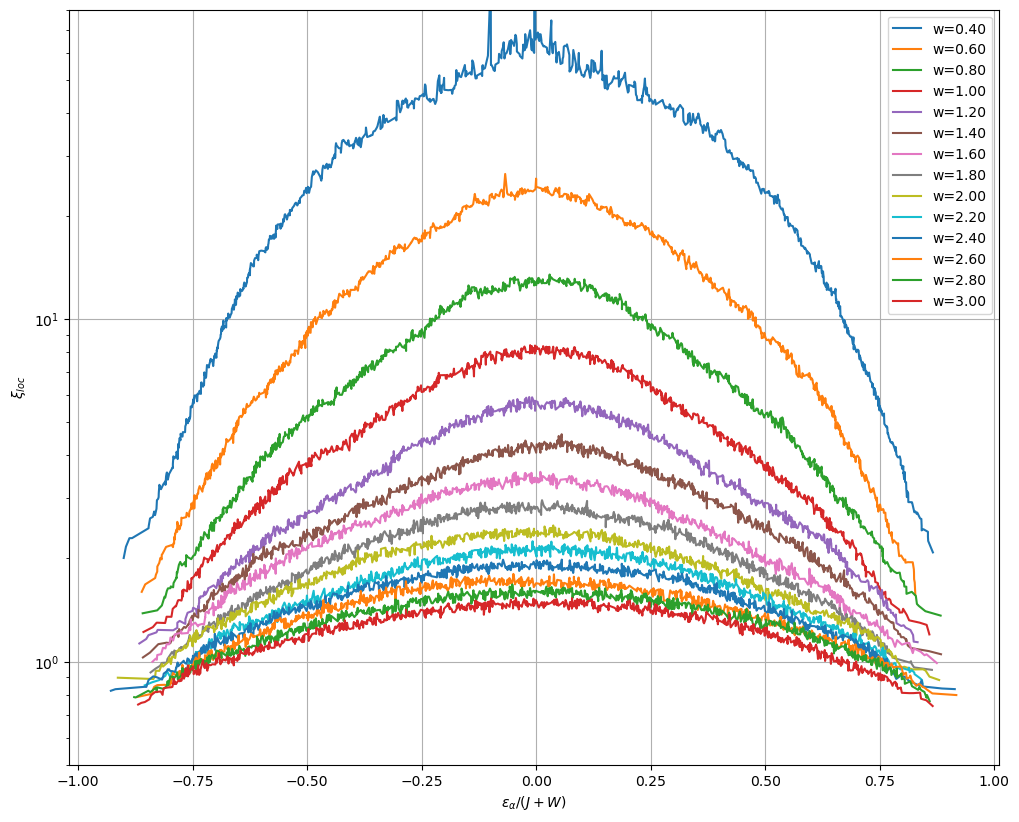

In [109]:

fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
for w in dis:
    loc_len = load_loc(w)
    if len(loc_len) > 0:
        p = ax.plot(loc_len[0], (loc_len[1]), label="w=%.2f"%(w))
        #ax.plot(loc_len[0], 12.0 / (w**2) * ( 1 - ( (1+w)*loc_len[0] )**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
        #pars, sth = fit(gaussian, loc_len[0], loc_len[1])
        #ax.plot(loc_len[0], gaussian(loc_len[0], *pars), color=p[0].get_color(), linestyle =':', label="gauss fit")

ax.set_ylabel(r"$\xi_{loc}$")
ax.set_xlabel(r"$\epsilon_{\alpha}/(J+W)$")
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_ylim(5e-1,8e1)


(-25.0, 0.0)

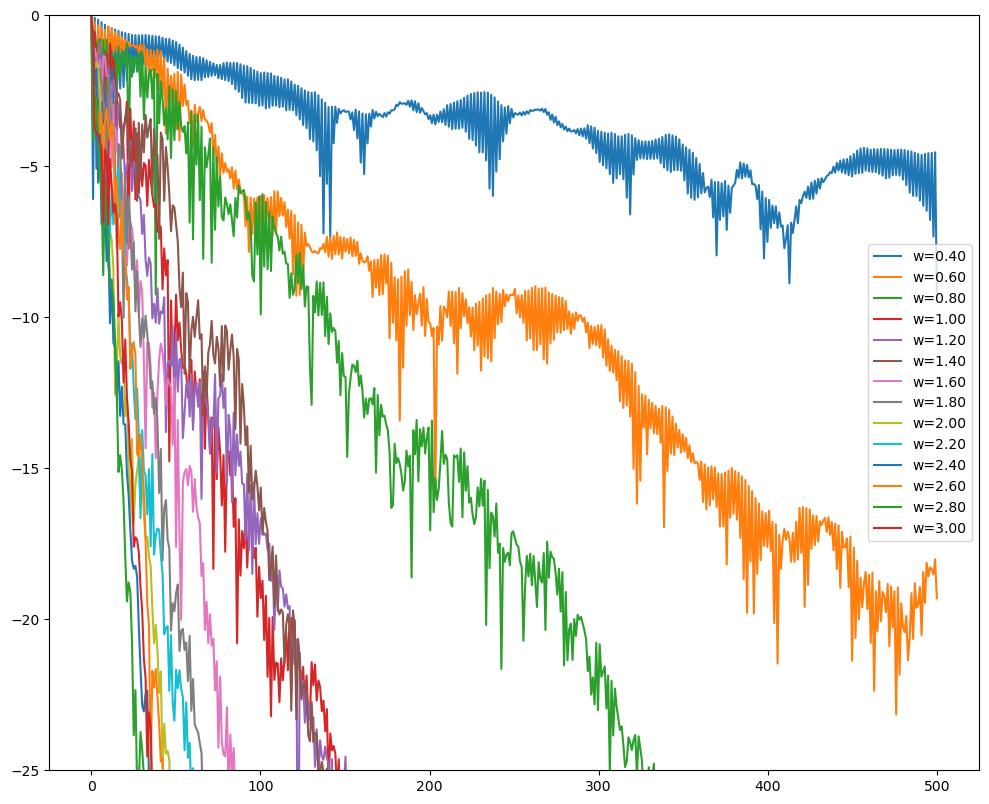

In [110]:
fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
for w in dis:
    loc_len = load_orbital(w, L / 2)
    if True:
        p = ax.plot(loc_len[0], (loc_len[1]), label="w=%.2f"%(w))
        #ax.plot(loc_len[0], 96.0 / (w**2) * (1-loc_len[0]**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(-25,0)

(-25.0, 0.0)

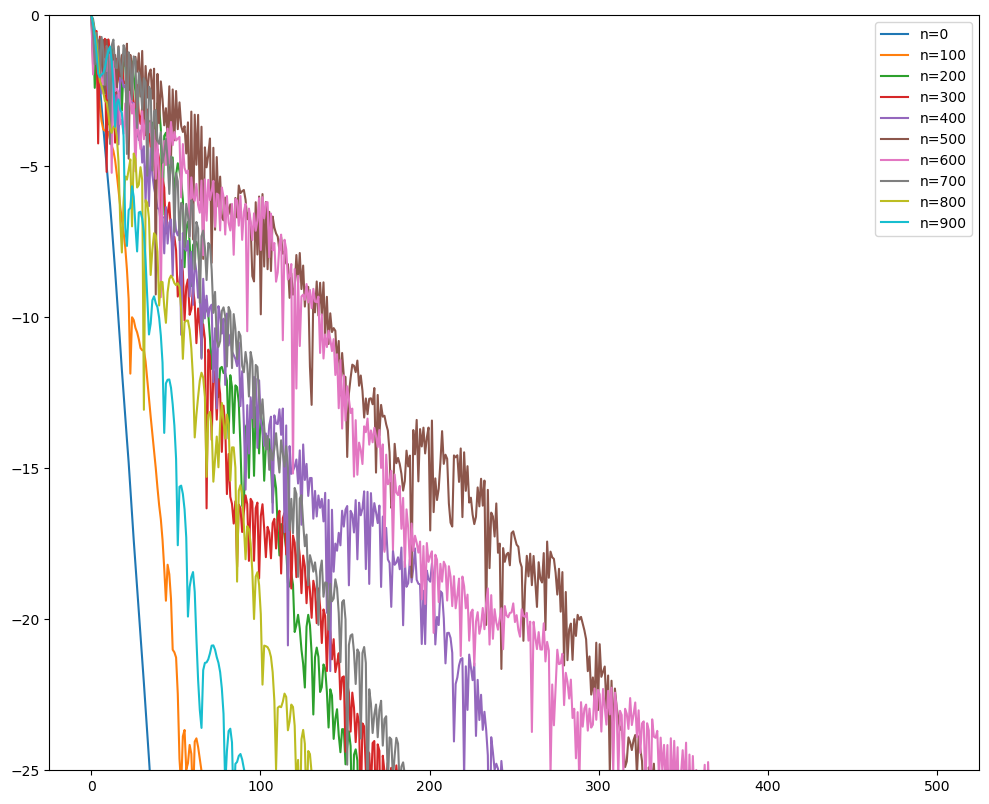

In [111]:
fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
w = 0.8
#for w in dis:
for n in range(0, L, 100): 
    loc_len = load_orbital(w, n)
    if True:
        p = ax.plot(loc_len[0], (loc_len[1]), label="n=%d"%(n))
ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(-25,0)

# SPECTRAL FORM FACTOR

In [112]:

def info_anderson(L, J, W):
    return "_L=%d,J=%.2f,J0=%.2f,W=%.2f.dat"%(L, J, 0.0, W)

print(dir)
def load(dir, L, W):
    """
    Load spectral data along with statistical measures

    Parameters:
    -----------------
        parameter : double/int
            current parameter value of 'scaling' parameter

        func_x : lambda
            rescaling function for x axis values (input function is x data and scaling parameter)

    """

    filename = dir + info_anderson(L, 1.0, W)
    
    if exists(filename):
        data = pd.read_table(filename, sep="\t", header=None)
        stats = []
        xdata = np.array(data[0])
        ydata = np.array(data[1])
        tH = data[2][0]
        tau = data[3][0]
        gap_ratio = data[4][0]
        return True, xdata, ydata, tH, tau, gap_ratio
    else:
        return False, np.array([]), np.array([]), None, None, None

def GOE(x : np.array):
    return np.array([2*a-a*np.log(1+2*a) if a < 1 else 2-a * np.log((2*a+1)/(2*a-1)) for a in x])


def xover(input_array, cut):
    x = input_array > cut
    return x.argmin() if x.any() else -1

../results/ANDERSON/3D/PBC/SpectralFormFactor/smoothed/


[0.00037287057932243966, 0.0003939551873096251, 0.00043078089700118754, 0.0003967014451188047, 0.0004167407124440608, 0.00038158053873840124, 0.0003807228071825598, 0.00036914349026292227, 0.00036204075554622346, 0.000353045363757553, 0.00037087940392748853, 0.00038961433074411573, 0.00041877759581473366, 0.00045530749166289763, 0.0004595148201363597, 0.0004882869125293293, 0.0004899867125689539, 0.00045381469622186437, 0.0003924024202940479, 0.0003412486947070039, 0.0002851044842081754]


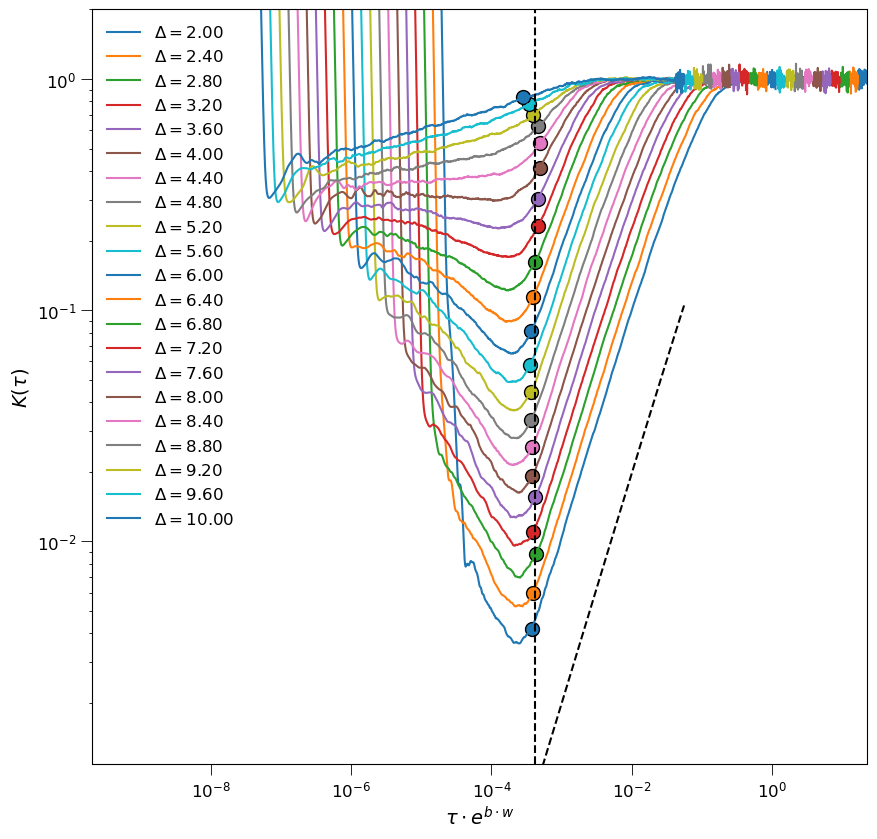

In [113]:
from tkinter import E

cf.set_params(_L=32)
W0=2.0
Wend = 10.0
dW = 0.4

L0=8
Lend=32
dL=8
func_x = lambda x, a: x / np.exp(0.75*a)
vals = []
if user_settings['scaling_idx'] == 0:
    vals = range(L0, Lend, dL)
else :
    for x in range(0, int((Wend-W0) / dW) + 1) :
        vals.append(W0 + x * dW)

plot_deviation = 0
eps = 1e-1

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi = 100)

y_min = 1.0e10;     y_max = -1.0e10;
x_min = 1.0e10;     x_max = -1.0e10;
tH = []
thouless_time = []
gap_ratio = []
timee = []
dir = f"..{kPSep}results{kPSep}" + f"ANDERSON{kPSep}3D{kPSep}PBC{kPSep}SpectralFormFactor{kPSep}"
if user_settings['smoothed'] == 1: dir = dir + f"smoothed{kPSep}"

for x in vals:
    status, times, sff, tH_tmp, tau, r = load(dir, 32, W = x)
    sff_dev = np.abs(np.log10(sff / GOE(times)))
    times = func_x(times, x)
    if plot_deviation: sff = sff_dev
    p = axis.plot(times, sff, label=hfun.key_title(x, user_settings))
    tH.append(tH_tmp)
    gap_ratio.append(r)

    tau = times[xover(sff_dev, eps)]
    thouless_time.append(tau)
    idx = min(range(len(times)), key=lambda i: abs(times[i] - tau));
    timee = times
    axis.scatter(tau, sff[idx], marker='o', facecolors=None, edgecolors='black', s=100)

    #-- xy-ranges
    mini = sff.min();  maxi = sff.max();
    if mini < y_min and np.isfinite(mini): y_min = mini
    if maxi > y_max and np.isfinite(maxi): y_max = maxi
    mini = times.min();  maxi = times.max();
    if mini < x_min and np.isfinite(mini): x_min = mini
    if maxi > x_max and np.isfinite(maxi): x_max = maxi

print(thouless_time)
hfun.set_plot_elements(axis = axis, xlim = (x_min*1e4, x_max), ylim = (0.3*y_min, 2.0), 
                                    xlabel = '\\tau \\cdot e^{b\\cdot w}', ylabel = 'K(\\tau)',
                                    settings=user_settings, font_size=12, set_legend=True)

axis.axvline(x=4.173e-4, ls='--', color='black')

if plot_deviation: axis.axhline(y=eps, ls='--', color='black')
else: axis.plot(timee, GOE(timee), label='GOE', linestyle='--', color='black')

(0.0007, 1)

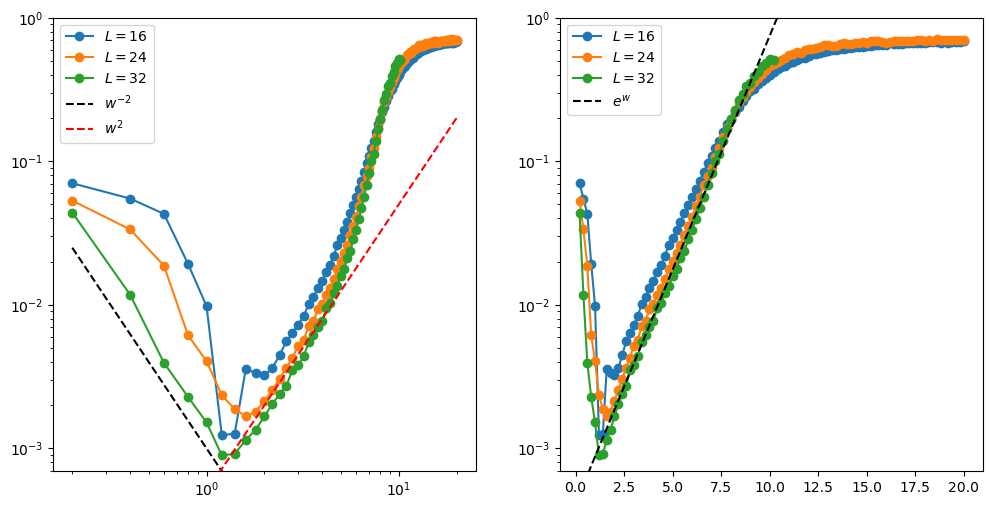

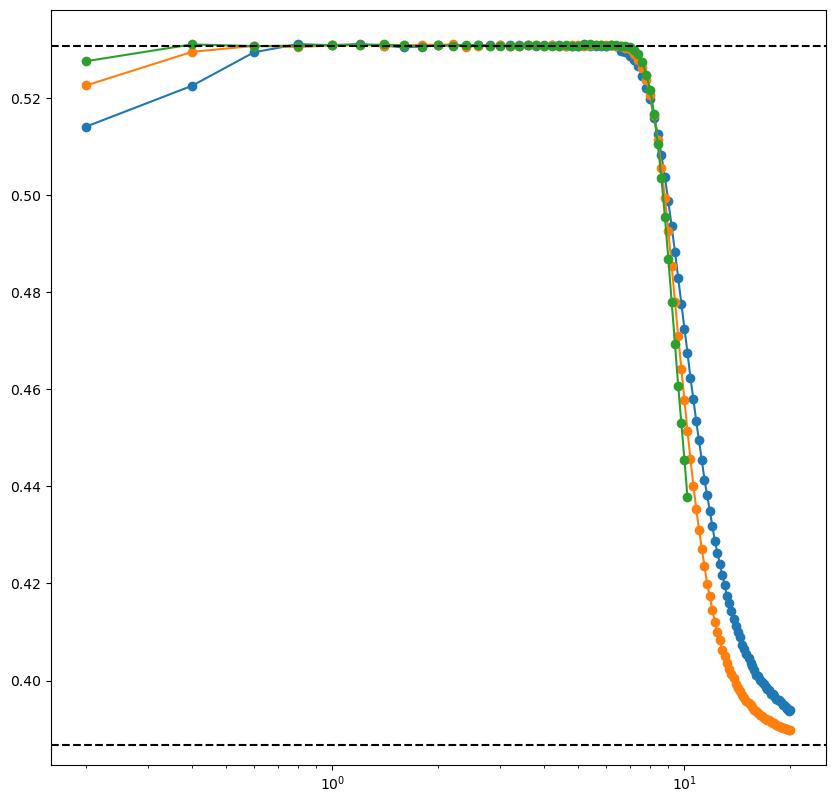

In [114]:
from cmath import nan


W0=0.2
Wend = 20.0
dW = 0.2

func_x = lambda x, a: x #* a**2
vals = []

for x in range(0, int((Wend-W0) / dW) + 1) :
    vals.append(W0 + x * dW)
vals = np.array(vals)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi = 100)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi = 100)

dir = f"..{kPSep}results{kPSep}" + f"ANDERSON{kPSep}3D{kPSep}PBC{kPSep}SpectralFormFactor{kPSep}" + f"smoothed{kPSep}"
for L in range(16,40,8):
    cf.set_params(_L=L)
    importlib.reload(cf)
    tH = []
    thouless_time = []
    gap_ratio = []
    timee = []
    for x in vals:
        status, times, sff, tH_tmp, tau, r = load(dir, L=L, W = x)
        sff_dev = np.abs(np.log10(sff / GOE(times)))
        
        idx = xover(sff_dev, eps)
        if idx > 0: tau = times[idx]# * tH_tmp / np.exp(0.5*L)
        else: tau = nan

        thouless_time.append(tau)
        tH.append(tH_tmp)
        gap_ratio.append(r)

    ax1.plot(vals, thouless_time, label=r"$L=%d$"%L, marker='o')
    ax2.plot(vals, thouless_time, label=r"$L=%d$"%L, marker='o')
    axis.plot(vals, gap_ratio, label=r"$L=%d$"%L, marker='o')
ax1.plot(vals, 1e-3/vals**2.0, linestyle='--', color='black', label=r"$w^{-2}$")
ax1.plot(vals, 5e-4*vals**2.0, linestyle='--', color='red', label=r"$w^{2}$")

axis.axhline(y=0.5307, ls='--', color='black')
axis.axhline(y=0.3867, ls='--', color='black')
axis.set_xscale('log')

b=0.75;  ax2.plot(vals, 0.75 / np.exp(10*b) * np.exp(b*vals), linestyle='--', color='black', label=r"$e^{w}$")

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()
ax2.legend()
ax1.set_ylim(7e-4,1)
ax2.set_ylim(7e-4,1)